

## Ejercicio 3 - Captura de datos y representación (2 ptos)

En este ejercicio haremos uso de la [siguiente página web](https://books.toscrape.com/). Se trata de un catálogo de libros con múltiples categorías. Nuestro objetivo es hacer una captura de datos de una web (o scraping) para almacenarlos y representarlos visualmente.

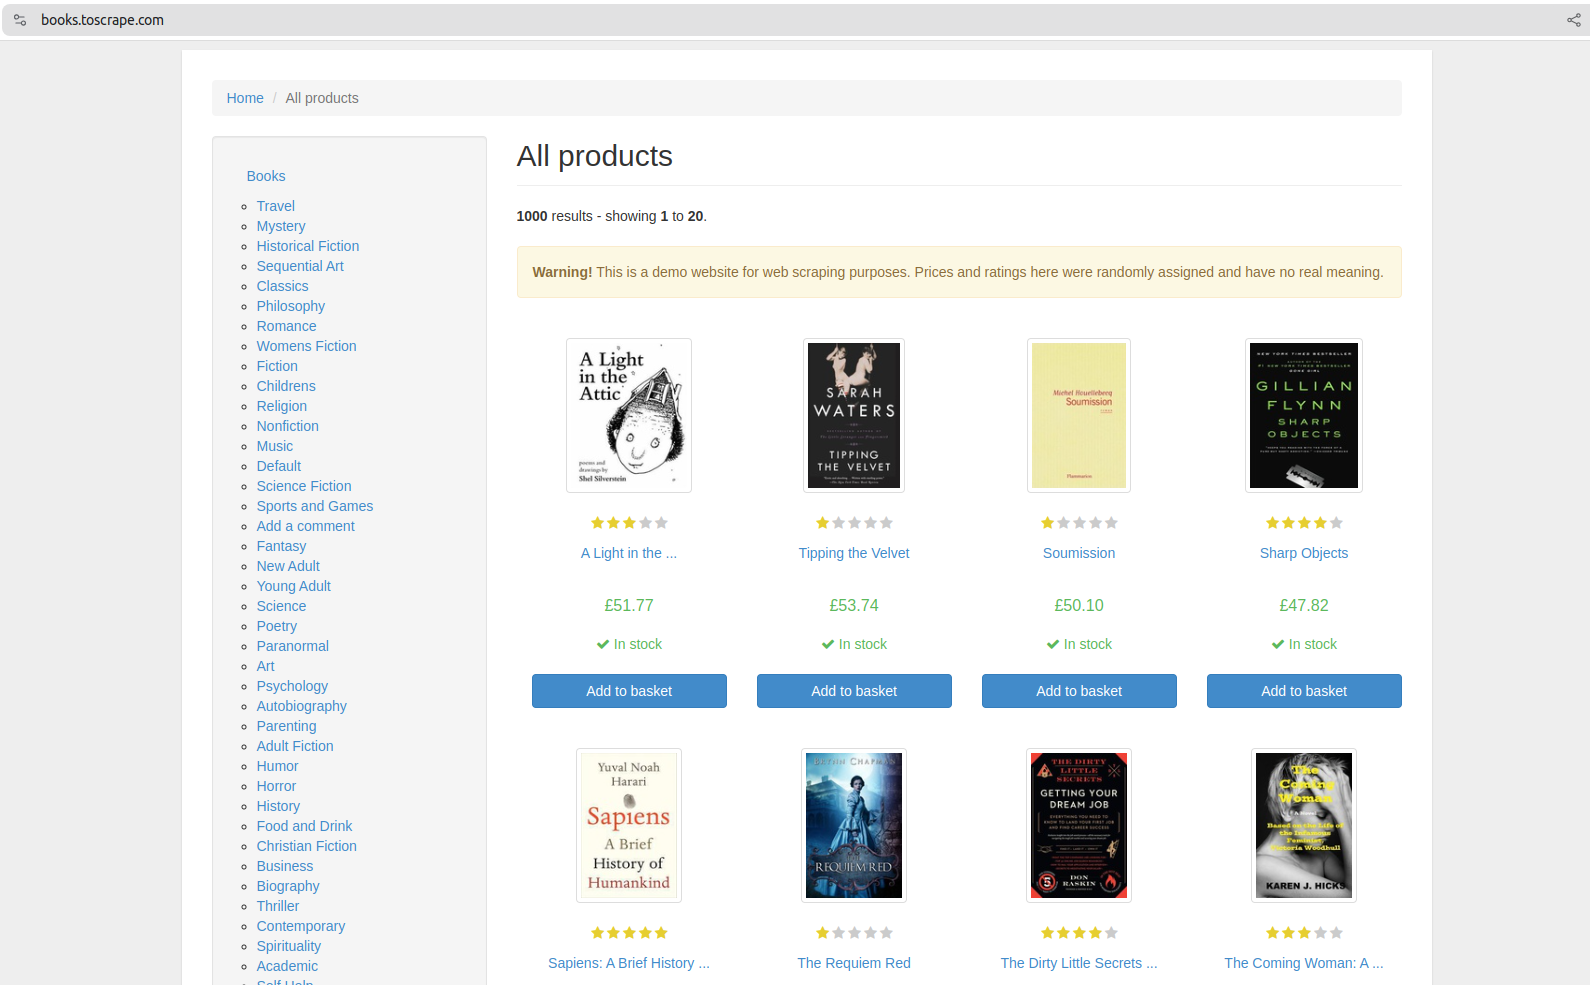

### Parte 1 (0.75 ptos)

Se debe extraer todos todos los libros y guardar los siguientes datos:
* **Nombre completo del libro**
* **La valoración, que puede ser uno de los siguientes valores [One, Two, Three, Four, Five]**
* **La descripción si está disponible, sino N/A**
* **El precio. Nos basta con extraer el precio del libro general, no es necesario extraer el precio incluyendo o sin incluir tasas. Solo se deberá incluir su valor numérico, sin £.**

Los datos se guardarán en un `.csv` bajo el nombre de `libros.csv` donde cada fila corresponderá a un libro.

Podemos hacer uso de la librería [`requests`](https://requests.readthedocs.io/en/latest/) y [`Beautiful Soup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) para navegar entre los html. Podemos utilizar la librería de [`Pandas`](https://pandas.pydata.org/pandas-docs/version/1.3/index.html) para elaborar un dataframe que podrá ser guardado en un `.csv`.

In [1]:
!pip install requests bs4 urllib3==1.26.18 pycodestyle_magic pycodestyle flake8

  Using cached urllib3-1.26.18-py2.py3-none-any.whl (143 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.23
    Uninstalling urllib3-1.23:
      Successfully uninstalled urllib3-1.23


In [2]:
#%load_ext pycodestyle_magic

In [3]:
# Desactivo para la entrega, lo he usado para mi mismo pero da errores
# En algunos momentos
#%pycodestyle_on

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


# TODO


from typing import List, Optional

# URL de la pagina principal del catálogo
base_url = "http://books.toscrape.com/catalogue/page-{}.html"

def extraer_datos(pagina: int,BASE_URL: str) -> List[dict]:
    """Extrae datos de una pagina especifica del catalogo de libros.

    Args:
        pagina (int): Número de la página a extraer.

    Returns:
        List: Lista con los datos de los libros.
    """
    response = requests.get(BASE_URL.format(pagina))
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')
    libros = soup.find_all('article', class_='product_pod')

    datos_libros = []
    for libro in libros:
        titulo = libro.h3.a['title']
        valoracion = libro.p['class'][1]

        # Descripción: navega al enlace del libro para obtener la descripción
        enlace_libro = libro.h3.a['href']
        url_libro = "http://books.toscrape.com/catalogue/" + enlace_libro
        descripcion = extraer_descripcion(url_libro)

        precio = libro.find('p', class_='price_color').text
        precio_numerico = float(precio.strip().replace('Â£', '').replace('£', ''))

        datos_libros.append({
            'titulo': titulo,
            'valoracion': valoracion,
            'descripcion': descripcion,
            'precio': precio_numerico
        })

    return datos_libros

def extraer_descripcion(url_libro: str) -> str:
    """Extrae la descripcion de un libro.

    Args:
        url_libro (str): URL de la pagina del libro.

    Returns:
        str: Descripción del libro o N/A si no hay.
    """
    response = requests.get(url_libro)
    soup = BeautifulSoup(response.text, 'html.parser')
    descripcion_tag = soup.find('meta', attrs={'name': 'description'})
    if descripcion_tag:
        descripcion = descripcion_tag['content'].strip()
    else:
        descripcion = 'N/A'
    return descripcion

def guardar_datos_libros(datos: List, nombre_archivo: str) -> None:
    """Guarda los libros en CSV y devuelve un DF.

    Args:
        datos (List): Lista con los datos de los libros.
        nombre_archivo (str): Nombre archivo CSV

    Returns:
        None
    """
    df_libros = pd.DataFrame(datos)

    if nombre_archivo:
        print(f'Saving to "{nombre_archivo}"')
        df_libros.to_csv(nombre_archivo, index=False)
        print('Saved!')

In [5]:
# Extraer y guardar los datos de los libros
todos_datos_libros = []
for i in range(1, 51):
    datos_pagina = extraer_datos(i, base_url)
    todos_datos_libros.extend(datos_pagina)
    print(f"Scraped {i} pages...")

guardar_datos_libros(todos_datos_libros, 'libros.csv')

Scraped 1 pages...
Scraped 2 pages...
Scraped 3 pages...
Scraped 4 pages...
Scraped 5 pages...
Scraped 6 pages...
Scraped 7 pages...
Scraped 8 pages...
Scraped 9 pages...
Scraped 10 pages...
Scraped 11 pages...
Scraped 12 pages...
Scraped 13 pages...
Scraped 14 pages...
Scraped 15 pages...
Scraped 16 pages...
Scraped 17 pages...
Scraped 18 pages...
Scraped 19 pages...
Scraped 20 pages...
Scraped 21 pages...
Scraped 22 pages...
Scraped 23 pages...
Scraped 24 pages...
Scraped 25 pages...
Scraped 26 pages...
Scraped 27 pages...
Scraped 28 pages...
Scraped 29 pages...
Scraped 30 pages...
Scraped 31 pages...
Scraped 32 pages...
Scraped 33 pages...
Scraped 34 pages...
Scraped 35 pages...
Scraped 36 pages...
Scraped 37 pages...
Scraped 38 pages...
Scraped 39 pages...
Scraped 40 pages...
Scraped 41 pages...
Scraped 42 pages...
Scraped 43 pages...
Scraped 44 pages...
Scraped 45 pages...
Scraped 46 pages...
Scraped 47 pages...
Scraped 48 pages...
Scraped 49 pages...
Scraped 50 pages...
Saving to

### Parte 2 (0.5 ptos)

Utilizando el `.csv` anterior, extraer la columna de precios de todos los libros y elabora un histograma con la distribución de los precios.

Para elaborar el histograma podemos utilizar la librería [`matplotlib`](https://matplotlib.org/stable/index.html), una librería muy utilizada para crear gráficos de manera sencilla y flexible.

In [6]:
!pip install matplotlib

El histograma resultante será similar al que aparece a continuación:
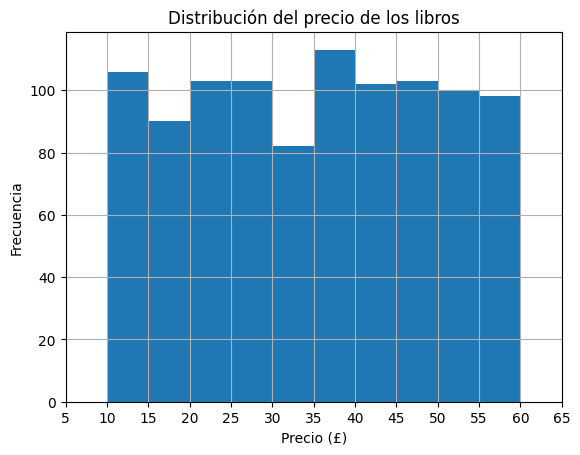

Podemos ver como la distribución del precio va en un **rango de 5 en 5, desde el valor 5 hasta el valor 65 (incluido)**.

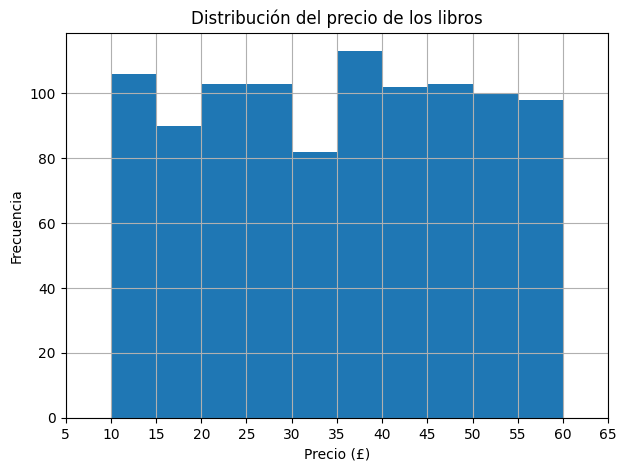

In [7]:
import matplotlib.pyplot as plt


# TODO
df_libros = pd.read_csv('/content/libros.csv')

plt.figure(figsize=(7, 5))
plt.hist(df_libros['precio'], bins=range(5, 65, 5))
plt.title('Distribución del precio de los libros')
plt.xlabel('Precio (£)')
plt.ylabel('Frecuencia')
plt.xticks(range(5, 70, 5))
plt.xlim(5, 65)
plt.grid(True)
plt.show()


### Parte 3 (0.75 ptos)

Esta parte consistirá en elaborar un histograma que compare la distribución de precios de los libros pertenecientes a las **categorías de romance (*romance*), fantasía (*fantasy*) y de comida y bebida (*food and drink*)**.

La página cuenta con diversas categorías, el objetivo es scrapear todos los libros de las categorías indicadas arriba.

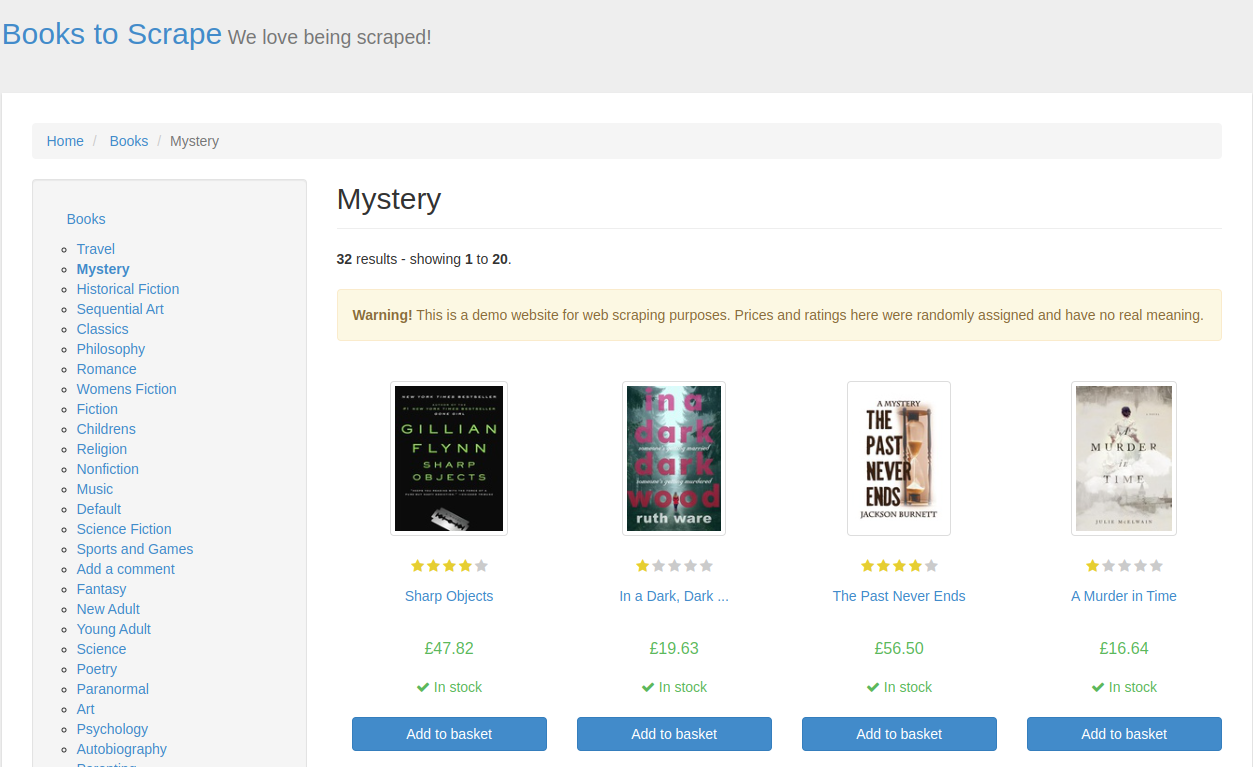

Debe ser un gráfico similar al que se muestra a continuación:

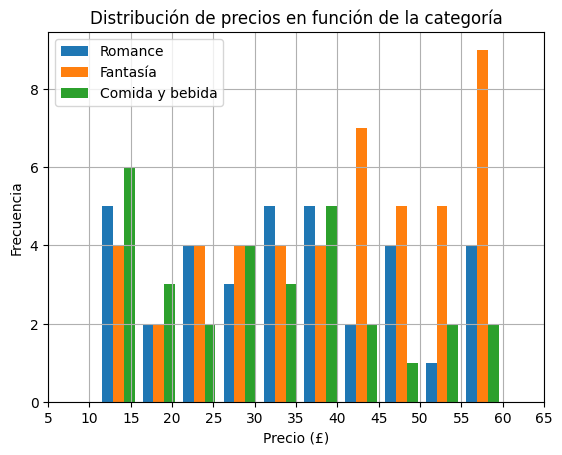

In [8]:
# TODO
def obtener_dataframe_categoria(base_url: str) -> pd.DataFrame:
    """Df con datos de libros de una categoria concreta.

    Args:
        base_url (str): URL de la categoria.

    Returns:
        pd.DataFrame: df con los datos de los libros.
    """
    todos_datos_libros = []
    for i in range(1, 100):
        datos_pagina = extraer_datos(i, base_url)
        if not datos_pagina:
            break
        todos_datos_libros.extend(datos_pagina)
        print(f"Datos extraídos de {i} páginas de {base_url.split('/')[-2]}...")

    return pd.DataFrame(todos_datos_libros)

In [9]:
# URLs de las categorías
URL_ROMANCE = "https://books.toscrape.com/catalogue/category/books/romance_8/page-{}.html"
URL_FANTASIA = "https://books.toscrape.com/catalogue/category/books/fantasy_19/page-{}.html"
URL_COMIDA_BEBIDA = "https://books.toscrape.com/catalogue/category/books/food-and-drink_33/page-{}.html"

df_romance = obtener_dataframe_categoria(URL_ROMANCE)
df_fantasia = obtener_dataframe_categoria(URL_FANTASIA)
df_comida_bebida = obtener_dataframe_categoria(URL_COMIDA_BEBIDA)

Datos extraídos de 1 páginas de romance_8...
Datos extraídos de 2 páginas de romance_8...
Datos extraídos de 1 páginas de fantasy_19...
Datos extraídos de 2 páginas de fantasy_19...
Datos extraídos de 3 páginas de fantasy_19...
Datos extraídos de 1 páginas de food-and-drink_33...
Datos extraídos de 2 páginas de food-and-drink_33...


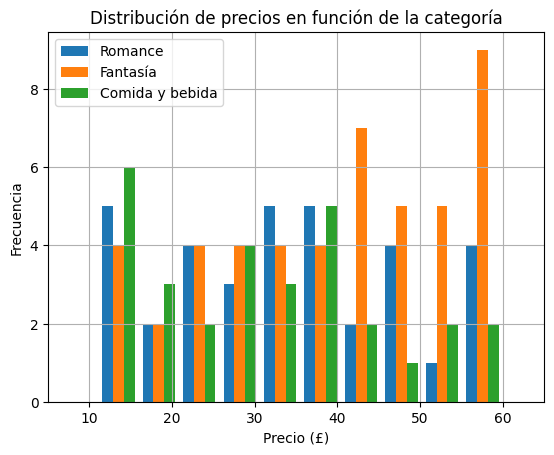

In [10]:
plt.hist([df_romance['precio'], df_fantasia['precio'],
          df_comida_bebida['precio']],
         label=['Romance', 'Fantasía', 'Comida y bebida'])
plt.title('Distribución de precios en función de la categoría')
plt.xlabel('Precio (£)')
plt.ylabel('Frecuencia')
plt.xlim(5, 65)
plt.legend()
plt.grid(True)
plt.show()

In [11]:
print(df_romance.shape)
print(df_fantasia.shape)
print(df_comida_bebida.shape)

(35, 4)
(48, 4)
(30, 4)


## Ejercicio 4 - Acceso a datos abiertos por API (2 ptos)

Para este ejercicio se utilizará la web de [datos.gob.es](https://datos.gob.es/es/).

*Datos abiertos del Gobierno de España* se trata de una plataforma que facilita el acceso a datos abiertos del sector público en España, fomentando la transparencia, la innovación y el desarrollo de soluciones basadas en datos para beneficio de la sociedad en general.

Cuenta con su propia API, cuya documentación podemos encontrar en este [enlace](https://datos.gob.es/es/apidata)

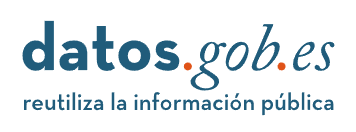

### Parte 1 (0.5 ptos)

Usando la API pública se pide obtener **todas las opciones de cobertura geográfica que tengan conjuntos de datos en el catálogo** y descargarlo en **formato `.csv`** bajo el nombre de **`cobertura_geografica.csv`**.

La cobertura geográfica se refiere a las áreas geográficas a las que se aplican los datos, ya sea a nivel nacional, regional o local.


Si la librería `requests` no funciona correctamente y arroja un error de *certificado SSL no válido*, se puede solucionar haciendo downgrade de la versión de `urllib3`.

In [12]:
!pip install -U urllib3==1.23

  Using cached urllib3-1.23-py2.py3-none-any.whl (133 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2023.8.1 requires urllib3>=1.24.3, but you have urllib3 1.23 which is incompatible.


In [13]:
import requests


# TODO
def obtener_cobertura_geografica_csv(url: str, nombre_csv: str) -> None:
    """
    Hace una solicitud get a la url pasada como argumento y guarda los datos
    de cobertura geografica en un CSV

    Args:
        url (str): URL usada para conseguir la cobertura geográfica.
        nombre_csv (str): archivo CSV a guardar.

    Returns:
        None
    """
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        datos = respuesta.json()
        elementos = datos['result']['items']
        registros = [
            {
                'about': item.get('_about', ''),
                'label': item.get('label', ''),
                'pais': item.get('pais', ''),
                'sameAs': item.get('sameAs', ''),
                'type': item.get('type', '')
            }
            for item in elementos
        ]
        df = pd.DataFrame(registros)
        df.to_csv(nombre_csv, index=False)
        print("CSV creado.")
    else:
        print("Error: ", respuesta.status_code)

url = "https://datos.gob.es/apidata/catalog/spatial"
nombre_csv = 'cobertura_geografica.csv'
obtener_cobertura_geografica_csv(url, nombre_csv)

CSV creado.


### Parte 2 (1 pto)

De la **comunidad autónoma de Cataluña** se pide obtener los **1000 primeros resultados filtrados por fecha de modificación (de más a menos reciente)** y elaborar un gráfico de barras donde la variable X sean las diferentes categorías (temas o *themes*) y la variable Y sea el número de apariciones en los resultados.

**Puede haber un documentos que tenga varios temas, en este caso debería incluirse la aparición en ambos temas.**

Podemos utilizar una librería como la de `matplotlib`para elaborar dicho gráfico de barras.

In [14]:
!pip install matplotlib

*El* gráfico de barras debería ser **similar** al siguiente:

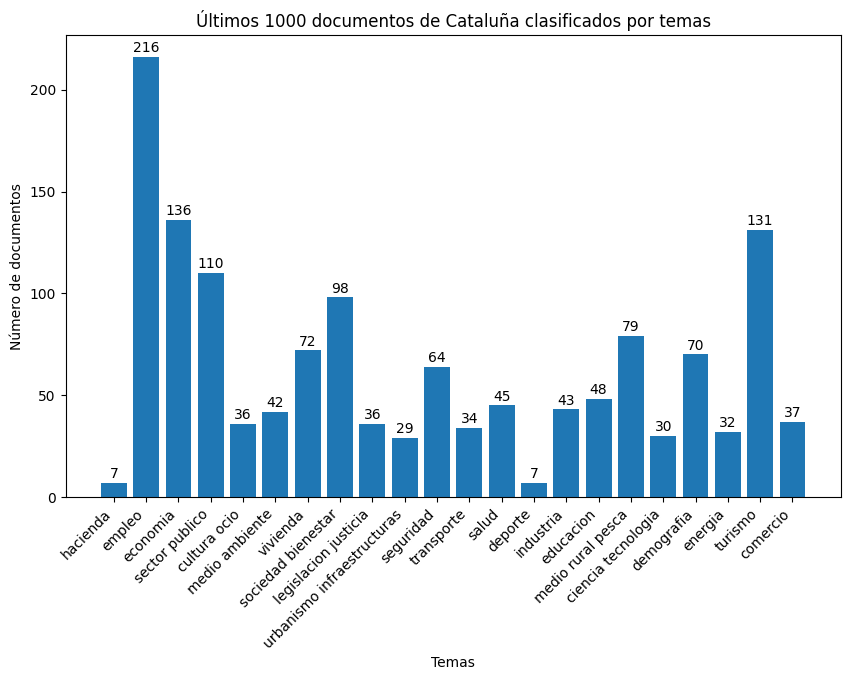

Si le pedimos a la API que nos devuelva la información en un formato JSON, veremos que en cada documento encontramos una propiedad especfícia acerca de la categoría. Los temas normalmente se encuentran representados como una URL, se pide representarlos de una forma más clara, similar al gráfico de barras.

Para mayor legibilidad, se ha especificado la siguiente escala dentro de `matplotlib` (`figsize=(10,6)`) y los `ticks` de la dimensión X se han rotado 45 grados. Además, se ha añadido el número de documentos encima de cada barra

In [15]:
import json
import matplotlib.pyplot as plt
import requests


# TODO
def obtener_cat(url: str, nombre_csv: str,
                pagina_primera: int, pagina_ultima: int) -> pd.DataFrame:
    """
    Solicitud get a la url pasada como argumento y guarda los datos
    de documentos en un CSV

    Args:
        url (str): URL usada.
        nombre_csv (str): archivo CSV a guardar.
        pagina_primera (int): primera pagina de resultados.
        pagina_ultima (int): ultima pagina de resultados.

    Returns:
        pd.DataFrame: DataFrame con los datos obtenidos.
    """
    registros_todos = []
    for i in range(pagina_primera,pagina_ultima):
        respuesta = requests.get(url + str(i))
        if respuesta.status_code == 200:
            datos = respuesta.json()
            elementos = datos['result']['items']
            for item in elementos:
                urls_temas = item.get('theme', [])
                # urls string a lista (cuando 1 ocurrencia)
                if isinstance(urls_temas, str):
                    urls_temas = [urls_temas]
                temas = []
                for url_tema in urls_temas:
                    # dividir strings
                    partes = url_tema.split('/')
                    if len(partes) > 6:
                        # tomo solo la parte 7
                        septima_parte = partes[6]
                        temas.append(septima_parte)
                registro = {
                        'temas_originales': ", ".join(urls_temas),
                        'temas': ", ".join(temas),
                        'modificado': item.get('modified', '')
                    }
                registros_todos.append(registro)
        else:
            print(f"Error en la página {i}: ", respuesta.status_code)
    df = pd.DataFrame(registros_todos)
    df.to_csv(nombre_csv, index=False)
    print("CSV creado.")
    return df

In [16]:
def conteo_temas(df: pd.DataFrame) -> pd.DataFrame:
    """
    Contea un DataFrame con la cantidad de documentos por tema.

    Args:
        df (pd.DataFrame): DataFrame con los datos de temas.

    Returns:
        pd.DataFrame: DataFrame con el conteo de temas.
    """
    df['temas'] = df['temas'].str.split(', ')
    temas_explodados = df.explode('temas')
    temas_explodados['temas'] = temas_explodados['temas'].apply(lambda x: x.replace('-', ' '))
    conteo_temas = temas_explodados['temas'].value_counts().reset_index()
    conteo_temas.columns = ['tema', 'conteo']

    # Ordeno segun categorias del grafico del enunciado
    orden_categorias = ['hacienda', 'empleo', 'economia', 'sector publico',
                        'cultura ocio', 'medio ambiente', 'vivienda',
                        'sociedad bienestar', 'legislacion justicia',
                        'urbanismo infraestructuras', 'seguridad',
                        'transporte', 'salud', 'deporte', 'industria',
                        'educacion', 'medio rural pesca', 'ciencia tecnologia',
                        'demografia', 'energia', 'turismo', 'comercio']
    conteo_temas['tema'] = pd.Categorical(conteo_temas['tema'],
                                          categories=orden_categorias,
                                          ordered=True)
    conteo_temas = conteo_temas.sort_values('tema').reset_index(drop=True)
    return conteo_temas

In [17]:
def crear_grafico_barras(conteo_temas: pd.DataFrame) -> None:
    """
    Crea un grafico de barras con los ultimos 1000 documentos por temas.

    Args:
        conteo_temas (pd.DataFrame): Datafragme con el conteo de temas.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    barras = plt.bar(conteo_temas['tema'], conteo_temas['conteo'])
    plt.title('Últimos 1000 documentos de Cataluña clasificados por temas')
    plt.xlabel('Temas')
    plt.ylabel('Número de documentos')
    plt.xticks(rotation=45, ha='right')
    # Numero encima de cada barra
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width() / 2,
                 altura, str(int(altura)), ha='center', va='bottom')
    plt.show()

In [18]:
url = "https://datos.gob.es/apidata/catalog/dataset/spatial/Autonomia/Cataluna?_sort=-modified&_pageSize=10&_page="
nombre_csv = 'cat.csv'
# He intentado hacer decenas de combinaciones de ultimos 1000 resultados
# probando diferentes paginas para que fuera el mismo numero de documentos
# pero no lo he conseguido, quizas tenga que ver que pueden haber sido
# modificados varias veces seguidas pero solo guarda la ultima modificacion
df = obtener_cat(url, nombre_csv, 0, 100)

CSV creado.


In [19]:
conteo_df = conteo_temas(df)

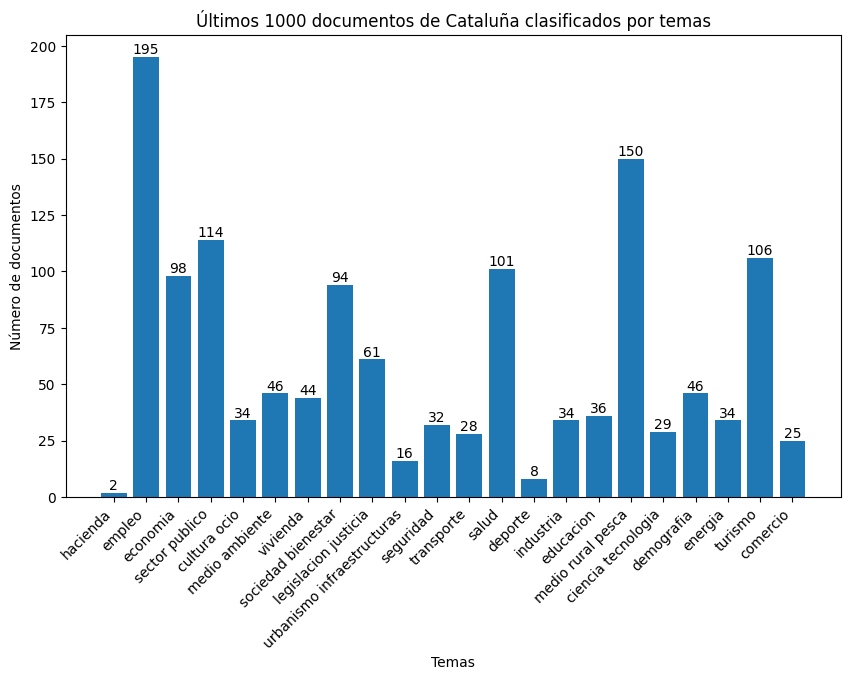

In [20]:
crear_grafico_barras(conteo_df)

### Parte 3 (0.5 ptos)

Representa la misma información en un gráfico de pastel, donde aparecerán los 6 resultados más relevantes (por número de aparición), los demás resultados irán en la categoría 'otros'.

Debería quedar algo **similar** al siguiente gráfico, con datos porcentuales:

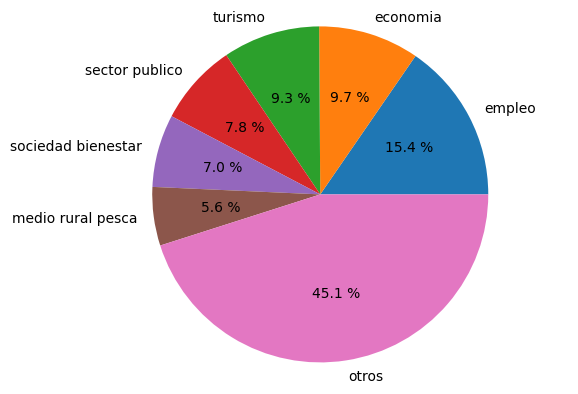

In [21]:
# TODO
def crear_grafico_pastel(conteo_temas: pd.DataFrame) -> None:
    """
    Grafico de pastel con los 6 primeros temas, otros en porcentage

    Args:
        conteo_temas (pd.DataFrame): Df con el conteo de temas.

    Returns:
        None
    """
    conteo_temas_ord = conteo_temas.sort_values(by='conteo', ascending=False)
    top_6 = conteo_temas_ord.iloc[:6]
    otros = pd.DataFrame({'tema': ['otros'],
                          'conteo': [conteo_temas_ord['conteo'][6:].sum()]})
    conteo_final = pd.concat([top_6, otros], ignore_index=True)
    #conteo_final = conteo_final.sort_values(by='conteo', ascending=False)
    #print(conteo_final)
    plt.figure(figsize=(6, 6))
    plt.pie(conteo_final['conteo'],
            labels=conteo_final['tema'],
            autopct='%1.1f%%', startangle=140)
    plt.show()

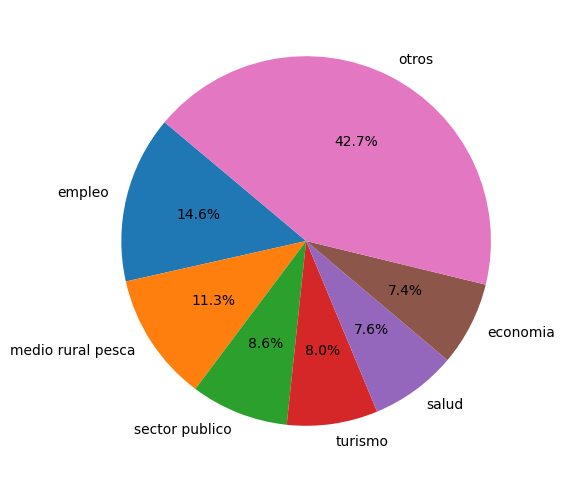

In [22]:
crear_grafico_pastel(conteo_df)

## Ejercicio 5 - Proyecto libre con datos abiertos (3 ptos)


Para esta tarea debes seleccionar un conjunto de datos abiertos de tu elección (idealmente deben ser datos de un área geográfica cercana a tu ubicación). Se puede seleccionar el conjunto del portal de datos abiertos de tu ayuntamiento/comunidad, de la página de [datos.gob.es](https://datos.gob.es/es/) o de cualquier **fuente de datos abiertos**.

Pueden usarse e integrarse más de un conjunto de datos abiertos (se valorará positivamente)!

Los datos no tienen porque obtenerse de una API, podemos trabajar directamente con un `.csv` o con un `.json`.

Se tendrá que elaborar un informe (en este mismo notebook) que recoja los siguientes apartados:

**1. Selección del conjunto de datos:**

Describe el conjunto de datos seleccionado, asegurándote que contenga información suficiente para poder hacer un análisis significativo. Comenta los siguientes apartados:
* El conjunto de datos que se va a tratar: ** El conjunto de datos que he escogido tiene la poblacion de la provicia de Albacete desglosado por municipios, años y sexo**
* Motivo para seleccionar el conjunto de datos: **Despues de buscar, me ha parecido un tema interesante y siempre de actualidad respecto a la demografia, en un momento que se habla de la perdida poblacional del interior de España, es util para entender la distribucion por sexo, por año, la despoblacion, etc**
* La fuente (url) usada para obtener los datos. **https://www.ine.es/jaxiT3/files/t/csv_bdsc/2855.csv**
* El formato del conjunto de datos **CSV, aunque es multiformato, podia haber elegido JSON u otros**
* La dimensión del conjunto de datos **Depende de cuando haga ETL y elija los datos que usare**
* Qué se desea analizar o explorar en estos datos. **Tendencia top municipios provincia de Albacete por sexos y global, comparacion en terminos relativos de diferentes municipios**
* Posibles limitaciones o sesgos en los datos que deban tenerse en cuenta durante el análisis. **Falta de datos, datos incoherentes, y la variabilidad entre los distintos municipios (ya que hay un gran municipio y luego alguno mediano y el resto muy pequeños)**

**2. Exploración de los datos:**

* Incluye el código necesario para cargar y preprocesar los datos.
* Explora las diferentes variables incluidas en el conjunto de datos.
* Elabora gráficas que faciliten la comprensión de los datos.
* Si es posible, trata de identificar tendencias o patrones interesantes en los datos.

En este apartado puedes incluir código Python así como las explicaciones que consideres oportunas.

**3. Conclusiones y valoraciones finales:**

Elabora un resumen breve con tus valoraciones finales basándote en la exploración de datos realizada.


**¿Qué se va a valorar?**
* Complejidad de los datos usados.
* Originalidad de la propuesta.
* Calidad de la exploración de los datos (gráficas, tendencias observadas, conclusiones, etc)
* Claridad del informe.
* El uso y la integración de más de un conjunto de datos abiertos se valorará positivamente.




In [23]:
url = 'https://www.ine.es/jaxiT3/files/t/csv_bdsc/2855.csv'
data = pd.read_csv(url, delimiter=';', dtype={'Total': str})

In [24]:
data

,Municipios,Sexo,Periodo,Total
0,02001 Abengibre,Total,2023,760
1,02001 Abengibre,Total,2022,739
2,02001 Abengibre,Total,2021,748
3,02001 Abengibre,Total,2020,761
4,02001 Abengibre,Total,2019,790
...,...,...,...,...
7387,02086 Yeste,Mujeres,2000,2.109
7388,02086 Yeste,Mujeres,1999,2.186
7389,02086 Yeste,Mujeres,1998,2.279
7390,02086 Yeste,Mujeres,1997,NaN


In [25]:
data[(data['Municipios'] == '02 Albacete')]

,Municipios,Sexo,Periodo,Total
252,02 Albacete,Total,2023,387.174
253,02 Albacete,Total,2022,385.727
254,02 Albacete,Total,2021,386.464
255,02 Albacete,Total,2020,388.270
256,02 Albacete,Total,2019,388.167
...,...,...,...,...
331,02 Albacete,Mujeres,2000,182.952
332,02 Albacete,Mujeres,1999,181.811
333,02 Albacete,Mujeres,1998,180.539
334,02 Albacete,Mujeres,1997,NaN


In [26]:
data.describe(include='all')

,Municipios,Sexo,Periodo,Total
count,7392,7392,7392.000000,7116
unique,88,3,NaN,2835
top,02001 Abengibre,Total,NaN,205
freq,84,2464,NaN,15
mean,NaN,NaN,2009.500000,NaN
std,NaN,NaN,8.078294,NaN
min,NaN,NaN,1996.000000,NaN
25%,NaN,NaN,2002.750000,NaN
50%,NaN,NaN,2009.500000,NaN
75%,NaN,NaN,2016.250000,NaN


In [27]:
data['Total'] = data['Total'].str.replace('.', '')

In [28]:
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')

In [29]:
data = data.dropna(subset=['Total'])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7116 entries, 0 to 7391
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Municipios  7116 non-null   object 
 1   Sexo        7116 non-null   object 
 2   Periodo     7116 non-null   int64  
 3   Total       7116 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 278.0+ KB


In [31]:
data.describe()

,Periodo,Total
count,7116.000000,7116.000000
mean,2009.982715,5848.738617
std,7.844903,31342.546501
min,1996.000000,22.000000
25%,2003.000000,311.000000
50%,2010.000000,674.500000
75%,2017.000000,1488.000000
max,2023.000000,402837.000000


In [32]:
# comparo que la provincia es la suma de municipios tanto totales como
# mujeres mas hombres para todos los periodos
for i in data['Periodo'].unique():
  #print(i)
  assert ((data[(data['Periodo'] == 2023) &
          (data['Sexo'] != 'Total') &
           (data['Municipios'] != '02 Albacete')].sum())['Total']
        ==
        data[(data['Periodo'] == 2023) &
             (data['Sexo'] == 'Total') &
             (data['Municipios'] != '02 Albacete')].sum()['Total']
        ==
        data[(data['Periodo'] == 2023) &
             (data['Sexo'] == 'Total') &
             (data['Municipios'] == '02 Albacete')].sum()['Total']
        ==
        data[(data['Periodo'] == 2023) &
             (data['Sexo'] != 'Total') &
             (data['Municipios'] == '02 Albacete')].sum()['Total']

  )

In [70]:
def grafico_evolucion_poblacion(data: pd.DataFrame) -> None:
    """
    Grafico de evolucion poblacion hombres y mujeres
    en toda la provincia, la capital y otros municipios de 1996 a 2023

    Args:
        data (pd.DataFrame): DataFrame con datos demograficos de Albacete.

    Returns:
        None
    """
    data_top = data[data['Municipios'] != '02 Albacete']

    suma_hombres = data_top[data_top['Sexo'] ==
                            'Hombres'].groupby('Periodo')['Total'].sum()
    suma_mujeres = data_top[data_top['Sexo'] ==
                            'Mujeres'].groupby('Periodo')['Total'].sum()
    suma_albacete_hom = data[
        (data['Municipios'] == '02003 Albacete') & (data['Sexo'] == 'Hombres')
    ].groupby('Periodo')['Total'].sum()
    suma_albacete_muj = data[
        (data['Municipios'] == '02003 Albacete') & (data['Sexo'] == 'Mujeres')
    ].groupby('Periodo')['Total'].sum()

    provincia_no_cap_m = data_top[
        (data_top['Municipios'] != '02003 Albacete') & (data_top['Sexo'] ==
                                                        'Mujeres')
    ].groupby('Periodo')['Total'].sum()
    provincia_no_cap_h = data_top[
        (data_top['Municipios'] != '02003 Albacete') & (data_top['Sexo'] ==
                                                        'Hombres')
    ].groupby('Periodo')['Total'].sum()

    plt.figure(figsize=(24, 6))
    plt.plot(
        provincia_no_cap_m.index, provincia_no_cap_m.values,
        label='Provincia mujeres sin capital', marker='o', color='orange'
    )
    plt.plot(
        provincia_no_cap_h.index, provincia_no_cap_h.values,
        label='Provincia hombres sin capital', marker='o', color='blue'
    )
    plt.plot(
        suma_hombres.index, suma_hombres.values,
        label='Hombres toda la provincia', marker='o', color='green'
    )
    plt.plot(
        suma_mujeres.index, suma_mujeres.values,
        label='Mujeres toda la provincia', marker='o', color='red'
    )
    plt.plot(
        suma_albacete_hom.index, suma_albacete_hom.values,
        label='Capital hombres', marker='o', color='yellow'
    )
    plt.plot(
        suma_albacete_muj.index, suma_albacete_muj.values,
        label='Capital mujeres', marker='o', color='grey'
    )

    plt.title('Cambio de la poblacion total, por sexos a lo largo del tiempo')
    plt.xlabel('Periodo')
    plt.ylabel('Total')
    plt.legend(title='Categorías')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(24, 6))
    plt.plot(
        provincia_no_cap_m.index, provincia_no_cap_m.values,
        label='Provincia mujeres sin capital', marker='o', color='orange'
    )
    plt.plot(
        provincia_no_cap_h.index, provincia_no_cap_h.values,
        label='Provincia hombres sin capital', marker='o', color='blue'
    )
    plt.title('Evolución de la población en municipios sin la capital')
    plt.xlabel('Periodo')
    plt.ylabel('Total')
    plt.legend(title='Categorías')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(24, 6))
    plt.plot(
        suma_albacete_hom.index, suma_albacete_hom.values,
        label='Capital hombres', marker='o', color='yellow'
    )
    plt.plot(
        suma_albacete_muj.index, suma_albacete_muj.values,
        label='Capital mujeres', marker='o', color='grey'
    )
    plt.title('Evolución de la población en la capital')
    plt.xlabel('Periodo')
    plt.ylabel('Total')
    plt.legend(title='Categorías')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(24, 6))
    plt.plot(
        suma_hombres.index, suma_hombres.values,
        label='Hombres toda la provincia', marker='o', color='green'
    )
    plt.plot(
        suma_mujeres.index, suma_mujeres.values,
        label='Mujeres toda la provincia', marker='o', color='red'
    )
    plt.title('Evolución de la población en toda la provincia')
    plt.xlabel('Periodo')
    plt.ylabel('Total')
    plt.legend(title='Categorías')
    plt.grid(True)
    plt.show()

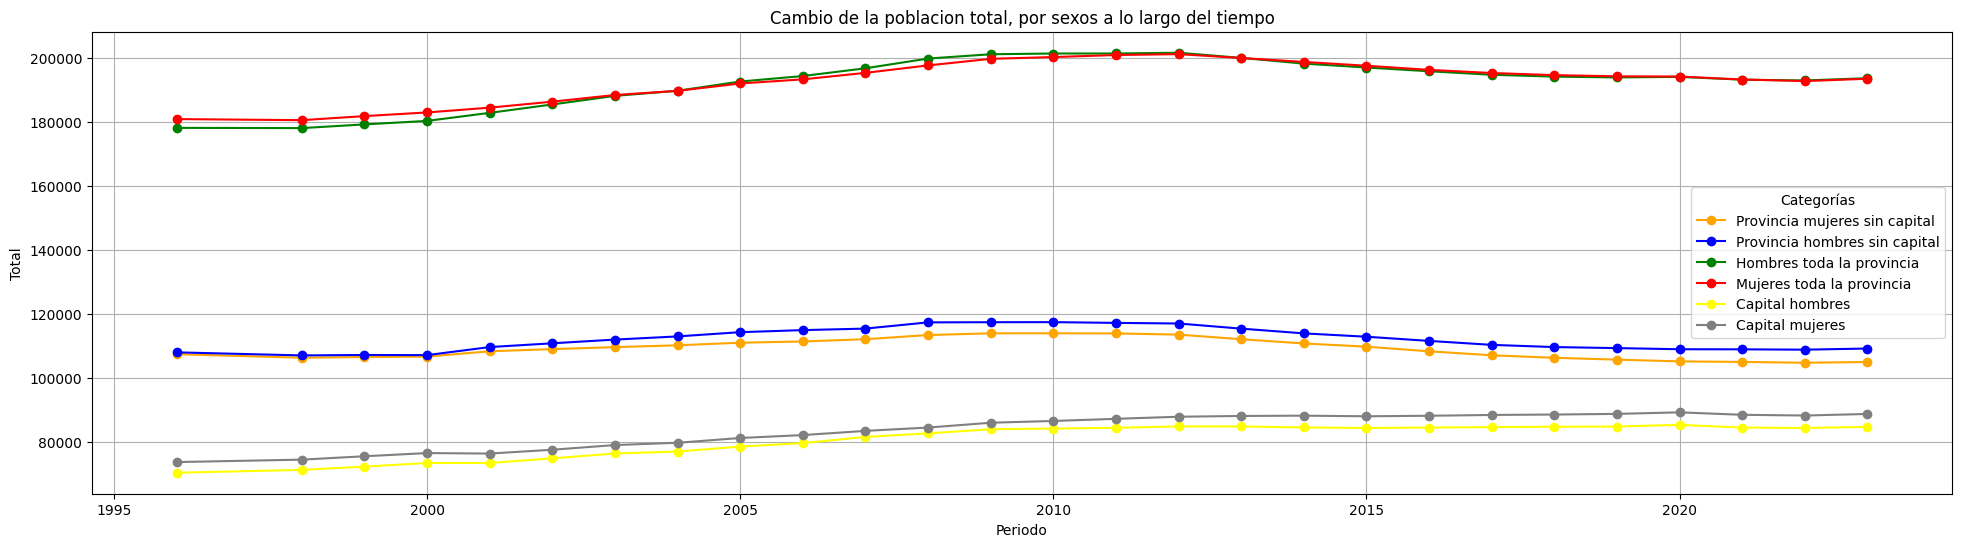

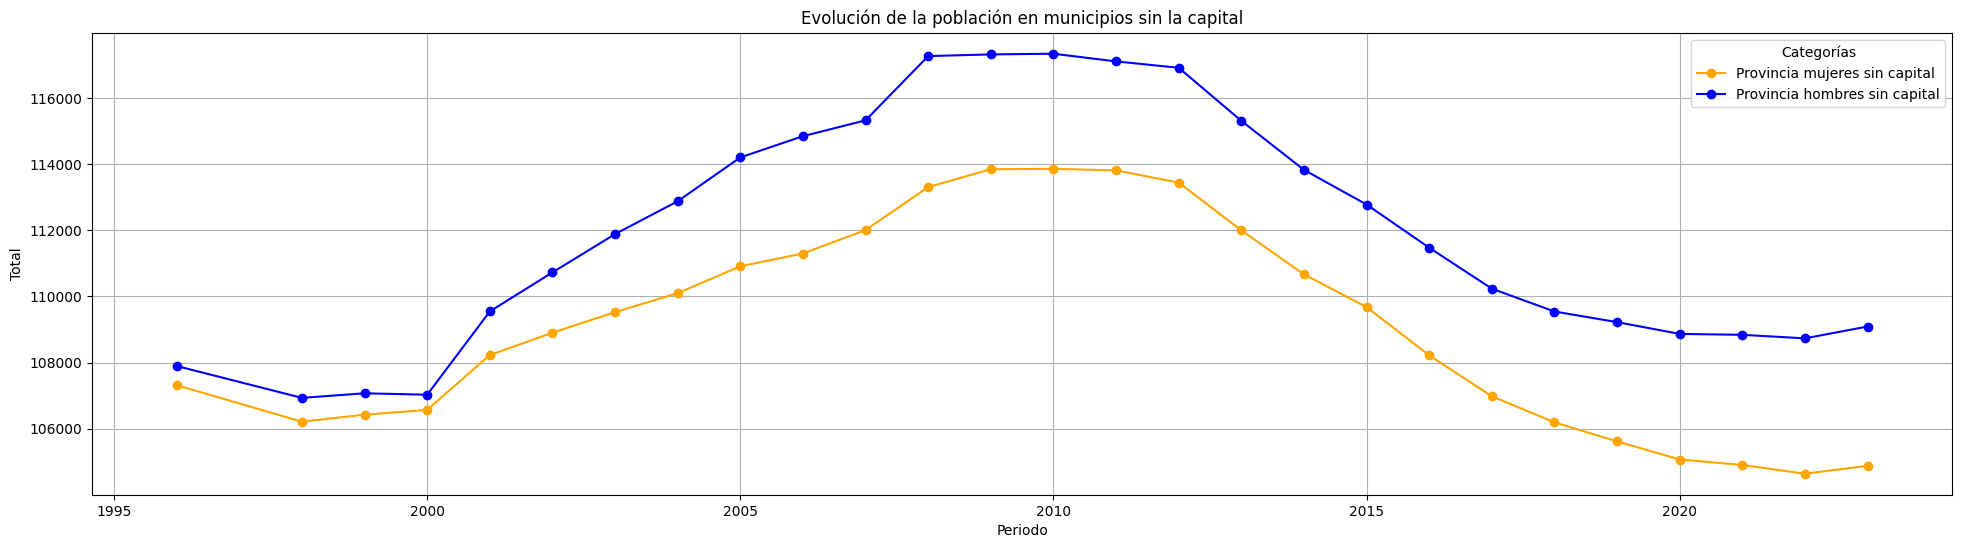

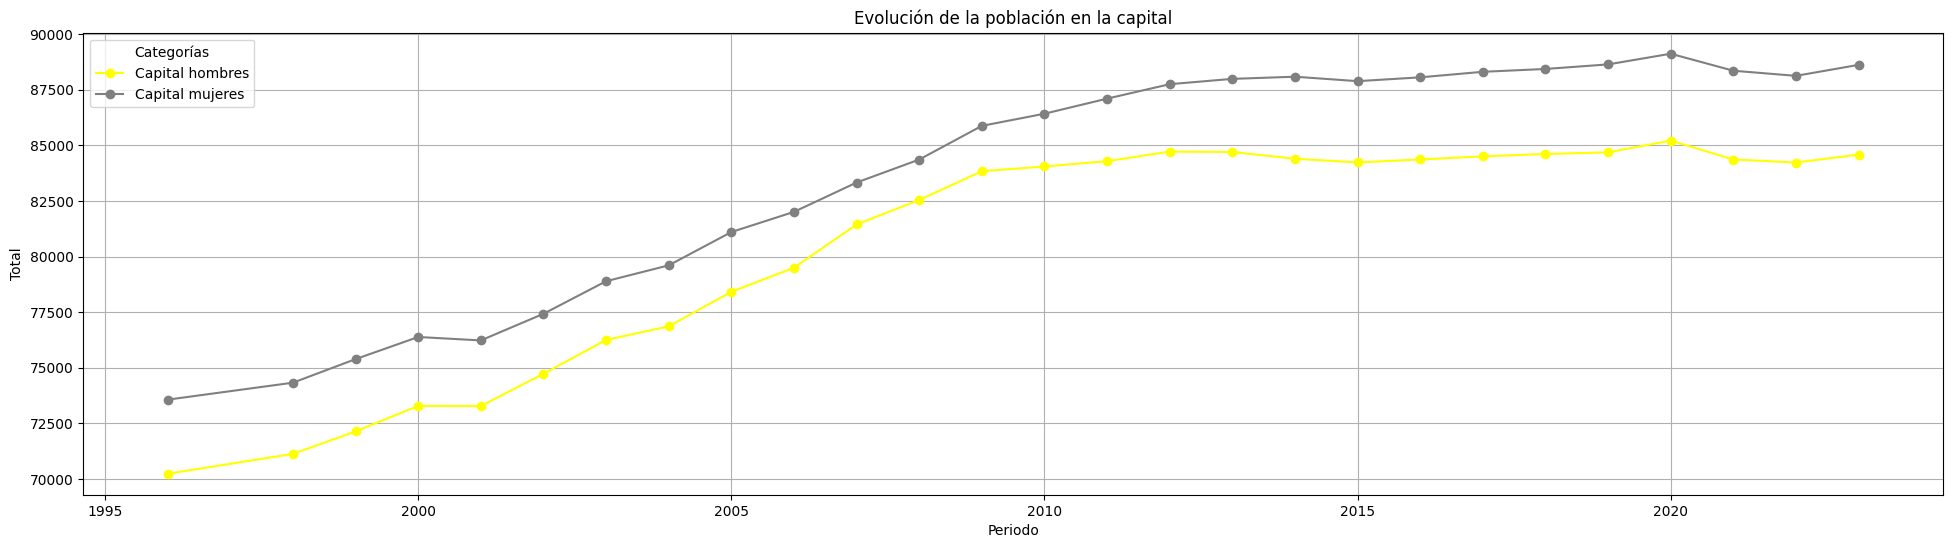

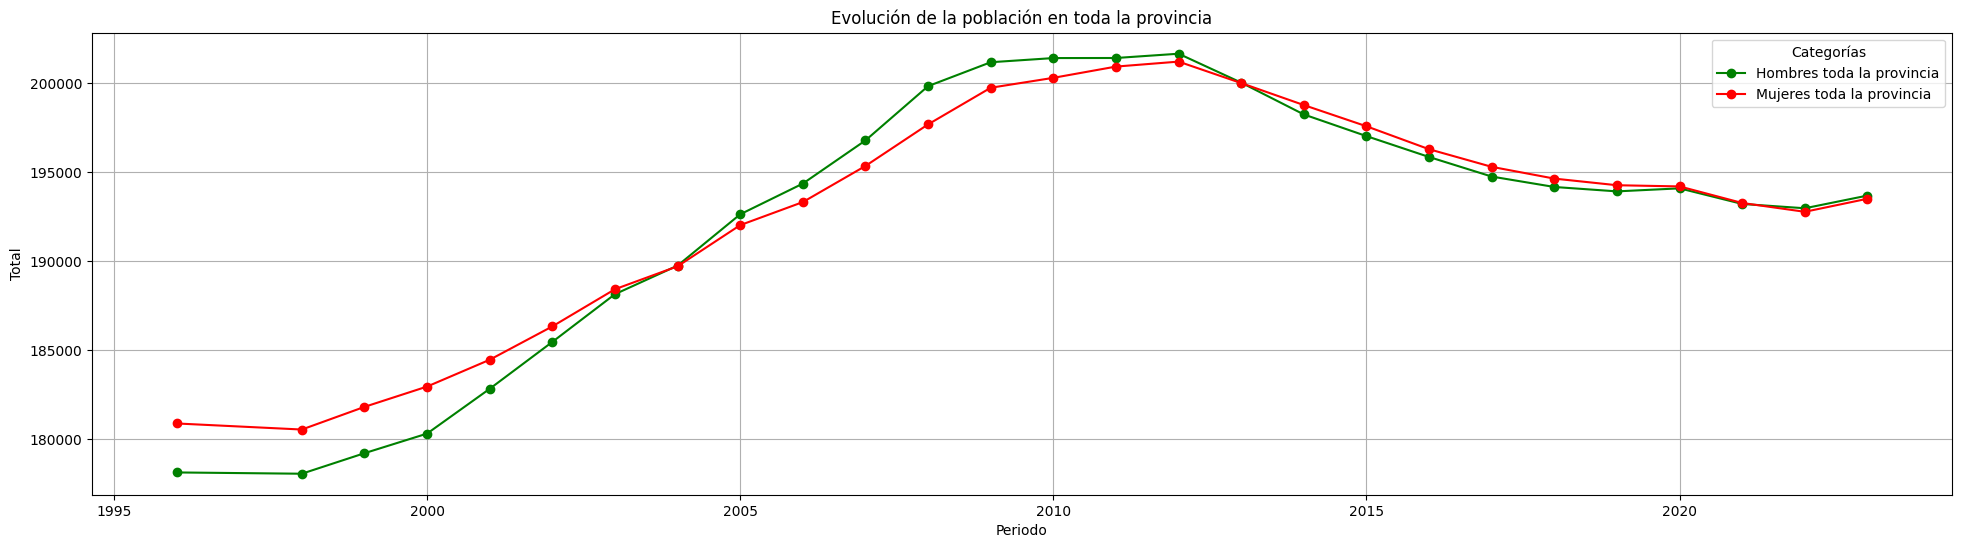

In [71]:
grafico_evolucion_poblacion(data)

In [35]:
data_2023_total = data[(data['Periodo'] == 2023) & (data['Sexo'] == 'Total')]

data_2023_total = data_2023_total.sort_values(by='Total', ascending=False)

data_2023_total=data_2023_total.head(31).tail(30).sort_values(by='Total',
                                                              ascending=True)

<Figure size 1200x3800 with 0 Axes>

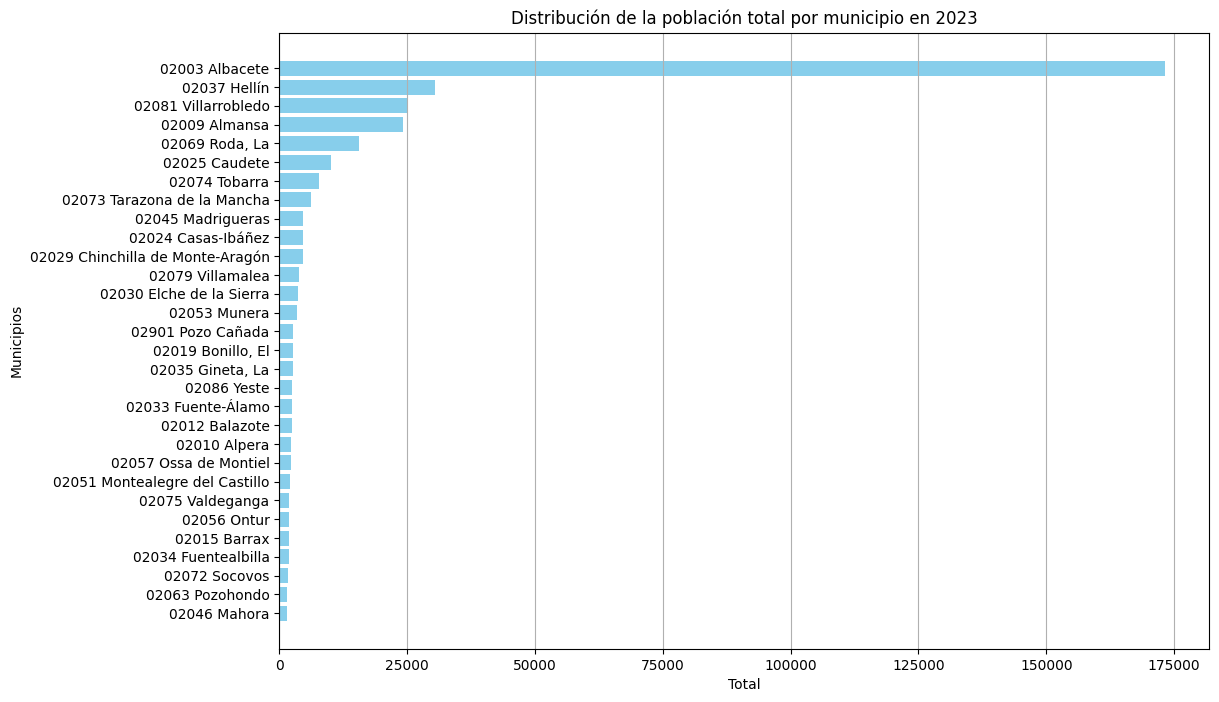

In [37]:
plt.figure(figsize=(12, 38))
plt.figure(figsize=(12, 8))
plt.barh(data_2023_total['Municipios'], data_2023_total['Total'], color='skyblue')
plt.title('Distribución de la población total por municipio en 2023')
plt.xlabel('Total')
plt.ylabel('Municipios')
plt.grid(axis='x')
plt.show()


In [65]:
def grafico_pastel_dist_sexo(data: pd.DataFrame) -> None:
    """
    Grafico de pastel para la distribución de la población por sexo en 2023
    en toda la provincia, la provincia excluyendo la capital y solo la capital.

    Args:
        data (pd.DataFrame): Dataframe con demografia de Albacete.

    Returns:
        None
    """
    data_2023_provincia = data[(data['Periodo'] ==
                                2023) & (data['Sexo'] !=
                                         'Total') &
                                          (data['Municipios'] !=
                                           '02 Albacete')]
    plt.figure(figsize=(4, 3))
    data_2023_provincia.groupby('Sexo')['Total'].sum().plot(kind='pie',
                                                            autopct='%1.1f%%',
                                                            colors=['skyblue',
                                                                    'lightcoral'
                                                                    ])
    plt.title('Población por sexo en 2023 en toda la provincia')
    plt.show()

    data_2023_provincia_ex_capital = data[(data['Periodo'] == 2023) &
                                          (data['Sexo'] != 'Total') &
                                          (data['Municipios'] !=
                                           '02 Albacete') &
                                          (data['Municipios'] !=
                                           '02003 Albacete')]

    plt.figure(figsize=(4, 3))
    d=data_2023_provincia_ex_capital.groupby('Sexo')['Total'].sum()
    d.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title('Población por sexo en 2023 en provincia ex-capital')
    plt.show()

    data_2023_capital = data[(data['Periodo'] == 2023) &
                             (data['Sexo'] != 'Total') &
                             (data['Municipios'] == '02003 Albacete')]

    plt.figure(figsize=(4, 3))
    data_2023_capital.groupby('Sexo')['Total'].sum().plot(kind='pie',
                                                          autopct='%1.1f%%',
                                                          colors=['blue',
                                                                  'lightgreen'])
    plt.title('Población por sexo en 2023 en capital')
    plt.show()

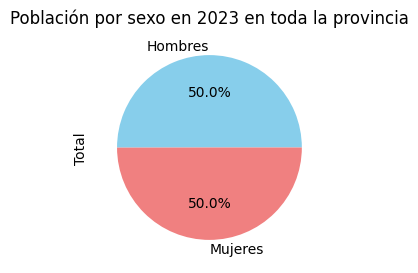

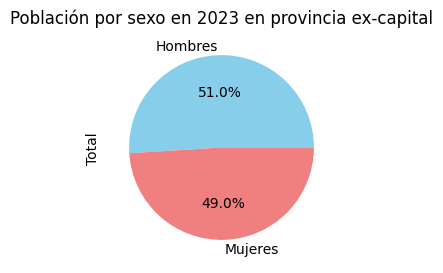

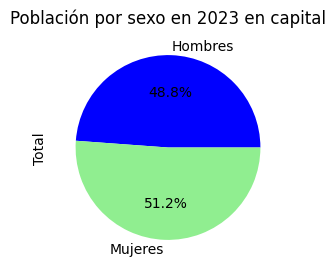

In [66]:
grafico_pastel_dist_sexo(data)

In [64]:
def calcular_diferencias_porcentaje(datos: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula las diferencias  de la población total, hombres y mujeres
    entre los años 1996 y 2023.

    Args:
        datos (pd.DataFrame): Df con datos demograficos de Albacete

    Returns:
        pd.DataFrame: df con las diferencias de la población.
    """
    datos_1996 = datos[datos['Periodo'] == 1996]
    datos_2023 = datos[datos['Periodo'] == 2023]

    datos_1996_h = datos_1996[datos_1996['Sexo'] ==
                              'Hombres'].rename(columns={'Total':
                                                         'Total_1996_Hombres'})
    datos_2023_h = datos_2023[datos_2023['Sexo'] ==
                              'Hombres'].rename(columns={'Total':
                                                         'Total_2023_Hombres'})

    datos_1996_m = datos_1996[datos_1996['Sexo'] ==
                              'Mujeres'].rename(columns={'Total':
                                                         'Total_1996_Mujeres'})
    datos_2023_m = datos_2023[datos_2023['Sexo'] ==
                              'Mujeres'].rename(columns={'Total':
                                                         'Total_2023_Mujeres'})

    datos_1996_t = datos_1996[datos_1996['Sexo'] ==
                              'Total'].rename(columns={'Total': 'Total_1996'})
    datos_2023_t = datos_2023[datos_2023['Sexo'] ==
                              'Total'].rename(columns={'Total': 'Total_2023'})

    datos_un = datos_1996_t[['Municipios',
                                 'Total_1996']].merge(
                                     datos_2023_t[['Municipios',
                                                   'Total_2023']],
                                     on='Municipios')
    datos_un = datos_un.merge(datos_1996_h[['Municipios',
                                                  'Total_1996_Hombres']],
                              on='Municipios')
    datos_un = datos_un.merge(datos_2023_h[['Municipios',
                                                  'Total_2023_Hombres']],
                              on='Municipios')
    datos_un = datos_un.merge(datos_1996_m[['Municipios',
                                                  'Total_1996_Mujeres']],
                              on='Municipios')
    datos_un = datos_un.merge(datos_2023_m[['Municipios',
                                                  'Total_2023_Mujeres']],
                              on='Municipios')

    datos_un['Diferencia_Total_%'] = ((datos_un['Total_2023'] -
                                       datos_un['Total_1996']) /
                                       datos_un['Total_1996'] * 100)
    datos_un['Diferencia_Hombres_%'] = ((datos_un['Total_2023_Hombres'] -
                                         datos_un['Total_1996_Hombres']) /
                                         datos_un['Total_1996_Hombres'] *
                                         100)
    datos_un['Diferencia_Mujeres_%'] = ((datos_un['Total_2023_Mujeres'] -
                                         datos_un['Total_1996_Mujeres']) /
                                         datos_un['Total_1996_Mujeres'] *
                                         100)

    return datos_un

In [58]:
datos_unidos = calcular_diferencias_porcentaje(data)

In [75]:
datos_unidos.columns

Index(['Municipios', 'Total_1996', 'Total_2023', 'Total_1996_Hombres',
       'Total_2023_Hombres', 'Total_1996_Mujeres', 'Total_2023_Mujeres',
       'Diferencia_Total_%', 'Diferencia_Hombres_%', 'Diferencia_Mujeres_%'],
      dtype='object')

In [76]:
datos_unidos[['Municipios','Total_1996', 'Total_2023',
              'Diferencia_Total_%', 'Diferencia_Hombres_%',
              'Diferencia_Mujeres_%']].sort_values(by='Diferencia_Total_%',
                                                   ascending=False)

,Municipios,Total_1996,Total_2023,Diferencia_Total_%,Diferencia_Hombres_%,Diferencia_Mujeres_%
27,02029 Chinchilla de Monte-Aragón,3153.0,4565.0,44.782747,45.058318,44.488189
35,"02035 Gineta, La",2083.0,2611.0,25.348056,35.194417,16.203704
52,02052 Motilleja,541.0,661.0,22.181146,35.074627,9.523810
2,02003 Albacete,143799.0,173206.0,20.450073,20.433124,20.466254
37,02037 Hellín,26021.0,30516.0,17.274509,18.954958,15.622619
...,...,...,...,...,...,...
61,02062 Povedilla,745.0,393.0,-47.248322,-45.663265,-49.008499
85,02085 Viveros,595.0,308.0,-48.235294,-47.896440,-48.601399
17,02017 Bogarra,1448.0,740.0,-48.895028,-48.211921,-49.639250
14,02013 Balsa de Ves,270.0,134.0,-50.370370,-46.575342,-54.838710


In [77]:
datos_unidos[['Municipios', 'Total_1996', 'Total_2023',
              'Diferencia_Total_%', 'Diferencia_Hombres_%',
              'Diferencia_Mujeres_%']].sort_values(by='Diferencia_Hombres_%',
                                                   ascending=False)

,Municipios,Total_1996,Total_2023,Diferencia_Total_%,Diferencia_Hombres_%,Diferencia_Mujeres_%
27,02029 Chinchilla de Monte-Aragón,3153.0,4565.0,44.782747,45.058318,44.488189
35,"02035 Gineta, La",2083.0,2611.0,25.348056,35.194417,16.203704
52,02052 Motilleja,541.0,661.0,22.181146,35.074627,9.523810
59,02060 Peñas de San Pedro,1282.0,1447.0,12.870515,25.811209,-1.655629
2,02003 Albacete,143799.0,173206.0,20.450073,20.433124,20.466254
...,...,...,...,...,...,...
61,02062 Povedilla,745.0,393.0,-47.248322,-45.663265,-49.008499
14,02013 Balsa de Ves,270.0,134.0,-50.370370,-46.575342,-54.838710
85,02085 Viveros,595.0,308.0,-48.235294,-47.896440,-48.601399
17,02017 Bogarra,1448.0,740.0,-48.895028,-48.211921,-49.639250


In [78]:
datos_unidos[['Municipios', 'Total_1996', 'Total_2023',
              'Diferencia_Total_%', 'Diferencia_Hombres_%',
              'Diferencia_Mujeres_%']].sort_values(by='Diferencia_Mujeres_%',
                                                   ascending=False)

,Municipios,Total_1996,Total_2023,Diferencia_Total_%,Diferencia_Hombres_%,Diferencia_Mujeres_%
27,02029 Chinchilla de Monte-Aragón,3153.0,4565.0,44.782747,45.058318,44.488189
2,02003 Albacete,143799.0,173206.0,20.450073,20.433124,20.466254
35,"02035 Gineta, La",2083.0,2611.0,25.348056,35.194417,16.203704
37,02037 Hellín,26021.0,30516.0,17.274509,18.954958,15.622619
69,"02069 Roda, La",13523.0,15542.0,14.930119,15.456156,14.402134
...,...,...,...,...,...,...
50,02050 Montalvos,153.0,89.0,-41.830065,-34.177215,-50.000000
11,02011 Ayna,1086.0,601.0,-44.659300,-38.715596,-50.646950
29,02028 Cotillas,235.0,131.0,-44.255319,-37.288136,-51.282051
86,02086 Yeste,5014.0,2478.0,-50.578381,-49.590324,-51.611587


In [210]:
def graficar_evolucion_poblacion_municipios(
    data: pd.DataFrame, municipio_1: str, municipio_2: str, municipio_3: str
) -> None:
    """
    Genera gráficos de línea para ver la evolución de la población.

    Args:
        data (pd.DataFrame): DataFrame con datos demográficos de Albacete.
        municipio_1 (str): Nombre del primer municipio.
        municipio_2 (str): Nombre del segundo municipio.
        municipio_3 (str): Nombre del tercer municipio.

    Returns:
        None
    """
    if 'Sexo' not in data.columns:
        plt.figure(figsize=(24, 6))

        municipio_1_data = data[data['Municipios'] == municipio_1]
        if municipio_2 != 'null':
            municipio_2_data = data[data['Municipios'] == municipio_2]
        if municipio_3 != 'null':
            municipio_3_data = data[data['Municipios'] == municipio_3]

        plt.plot(
            municipio_1_data['Periodo'], municipio_1_data['Total'],
            label=f'Total {municipio_1}', marker='o', color='grey'
        )
        if municipio_2 != 'null':
            plt.plot(
                municipio_2_data['Periodo'], municipio_2_data['Total'],
                label=f'Total {municipio_2}', marker='o', color='purple'
            )
        if municipio_3 != 'null':
            plt.plot(
                municipio_3_data['Periodo'], municipio_3_data['Total'],
                label=f'Total {municipio_3}', marker='o', color='green'
            )
    else:
        hombres_municipio_1 = data[
            (data['Municipios'] == municipio_1) &
            (data['Sexo'] == 'Hombres')
        ].groupby('Periodo')['Total'].sum()

        mujeres_municipio_1 = data[
            (data['Municipios'] == municipio_1) &
            (data['Sexo'] == 'Mujeres')
        ].groupby('Periodo')['Total'].sum()

        hombres_municipio_2 = data[
            (data['Municipios'] == municipio_2) &
            (data['Sexo'] == 'Hombres')
        ].groupby('Periodo')['Total'].sum()

        mujeres_municipio_2 = data[
            (data['Municipios'] == municipio_2) &
            (data['Sexo'] == 'Mujeres')
        ].groupby('Periodo')['Total'].sum()

        hombres_municipio_3 = data[
            (data['Municipios'] == municipio_3) &
            (data['Sexo'] == 'Hombres')
        ].groupby('Periodo')['Total'].sum()

        mujeres_municipio_3 = data[
            (data['Municipios'] == municipio_3) &
            (data['Sexo'] == 'Mujeres')
        ].groupby('Periodo')['Total'].sum()

        plt.figure(figsize=(24, 6))

        plt.plot(
            hombres_municipio_1.index, hombres_municipio_1.values,
            label=f'Hombres {municipio_1}', marker='o', color='blue'
        )
        plt.plot(
            mujeres_municipio_1.index, mujeres_municipio_1.values,
            label=f'Mujeres {municipio_1}', marker='o', color='red'
        )
        plt.plot(
            hombres_municipio_2.index, hombres_municipio_2.values,
            label=f'Hombres {municipio_2}', marker='o', color='green'
        )
        plt.plot(
            mujeres_municipio_2.index, mujeres_municipio_2.values,
            label=f'Mujeres {municipio_2}', marker='o', color='orange'
        )
        plt.plot(
            hombres_municipio_3.index, hombres_municipio_3.values,
            label=f'Hombres {municipio_3}', marker='o', color='purple'
        )
        plt.plot(
            mujeres_municipio_3.index, mujeres_municipio_3.values,
            label=f'Mujeres {municipio_3}', marker='o', color='grey'
        )

    plt.title('Evolución de la población de hombres y mujeres en municipios dados')
    plt.xlabel('Periodo')
    plt.ylabel('Total')
    plt.legend(title='Categorías')
    plt.grid(True)
    plt.show()



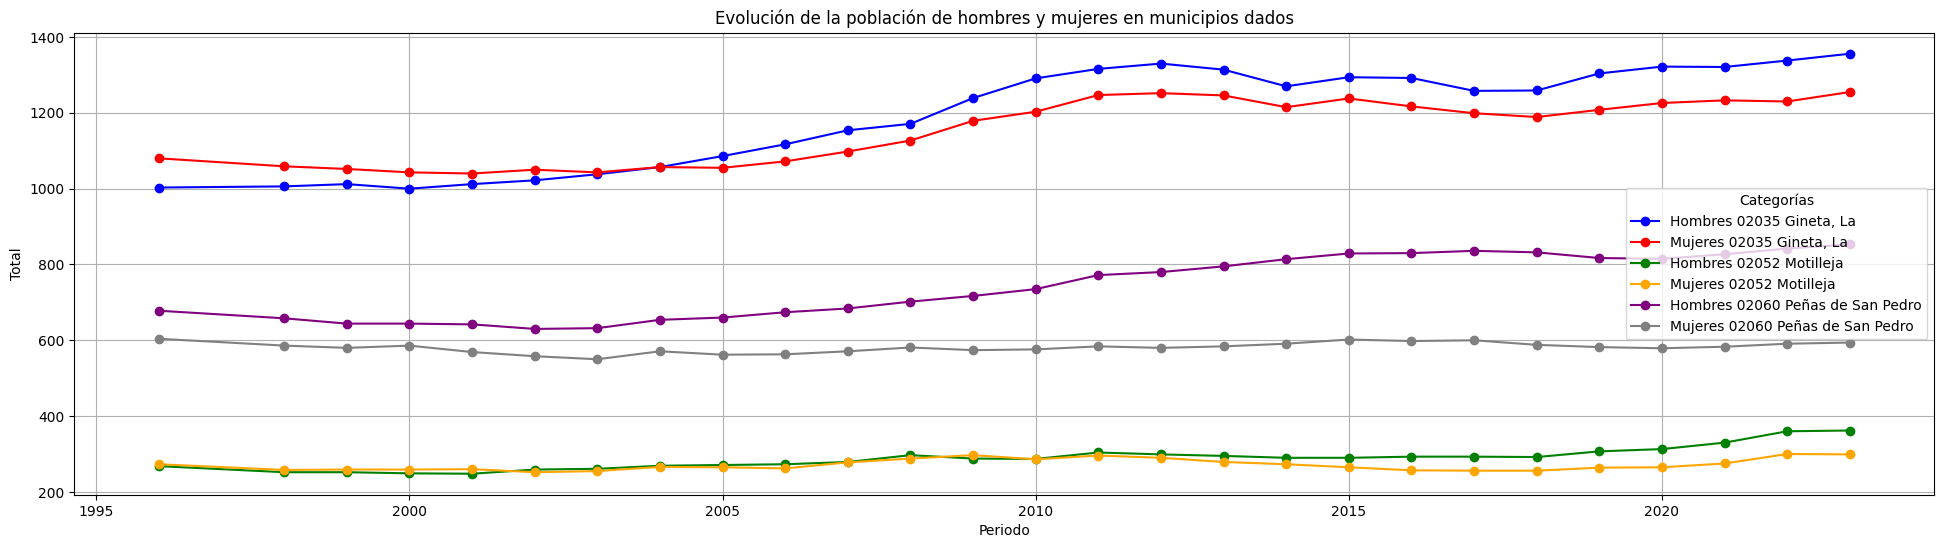

In [211]:
graficar_evolucion_poblacion_municipios(
    data, '02035 Gineta, La', '02052 Motilleja', '02060 Peñas de San Pedro')

In [195]:
data0 = data[['Municipios','Periodo','Total']][data['Sexo'] == 'Total']

In [198]:
url2 = 'https://www.ine.es/jaxiT3/files/t/csv_bdsc/3085.csv'
data2 = pd.read_csv(url2, delimiter=';', dtype={'Total': str})

In [199]:
data2['Total'] = data2['Total'].str.replace('.', '')

In [200]:
data2['Total'] = pd.to_numeric(data2['Total'], errors='coerce')

In [158]:
data2.describe()

,Periodo
count,880.000000
mean,1945.200000
std,29.019251
min,1900.000000
25%,1920.000000
50%,1945.000000
75%,1970.000000
max,1991.000000


In [159]:
data2= data2[data2['Periodo'] <= 1996]

In [161]:
data2

,Municipios,Periodo,Total
0,02 Albacete,1991,341.847
1,02 Albacete,1981,334.468
2,02 Albacete,1970,335.026
3,02 Albacete,1960,370.976
4,02 Albacete,1950,397.100
...,...,...,...
875,02999 Población en municipios desaparecidos de...,1940,NaN
876,02999 Población en municipios desaparecidos de...,1930,NaN
877,02999 Población en municipios desaparecidos de...,1920,NaN
878,02999 Población en municipios desaparecidos de...,1910,NaN


In [201]:
data3=pd.concat([data0, data2], ignore_index=True)

In [193]:
data3

,Municipios,Periodo,Total
1674,02901 Pozo Cañada,2023,2703.0
1675,02901 Pozo Cañada,2022,2763.0
1676,02901 Pozo Cañada,2021,2797.0
1677,02901 Pozo Cañada,2020,2791.0
1678,02901 Pozo Cañada,2019,2797.0
...,...,...,...
2377,02 Albacete,1940,374.472
2378,02 Albacete,1930,332.619
2379,02 Albacete,1920,291.833
2380,02 Albacete,1910,264.698


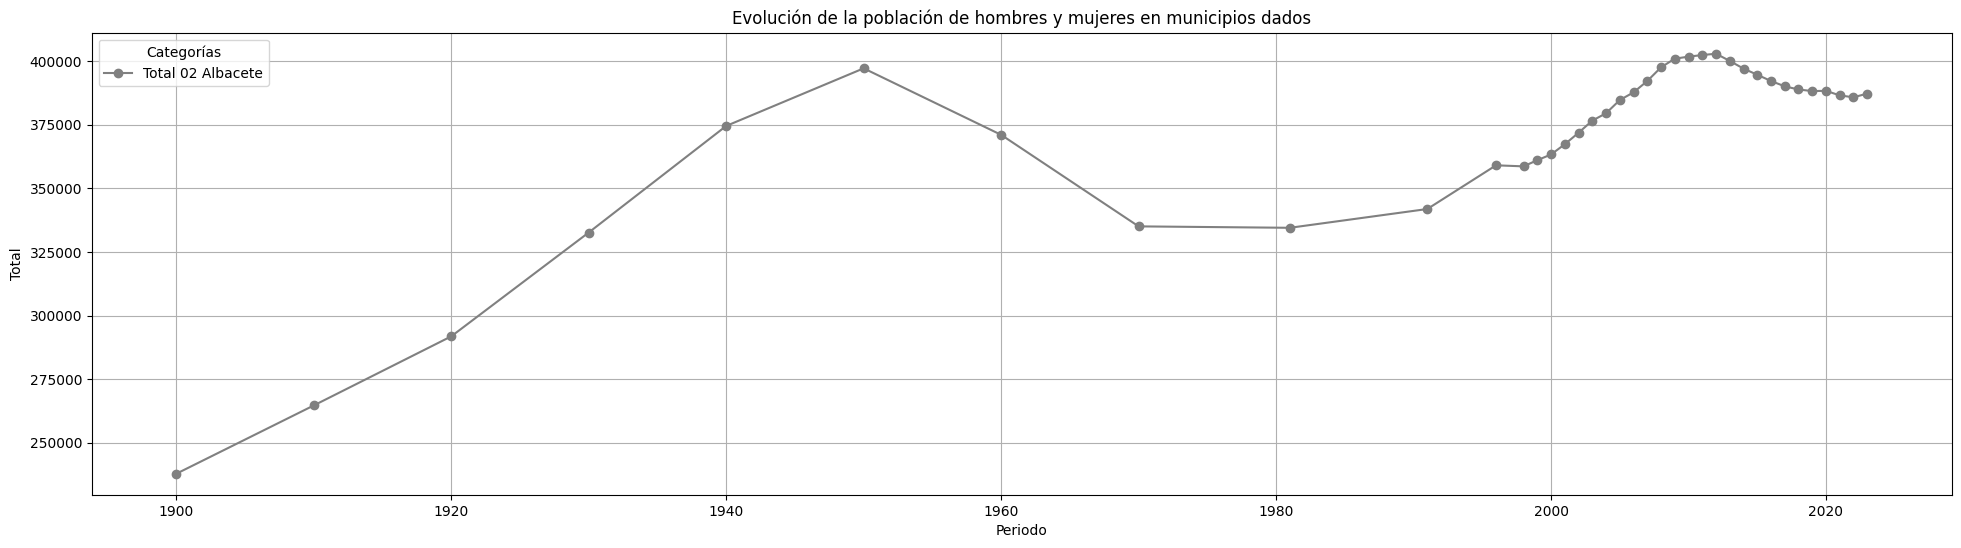

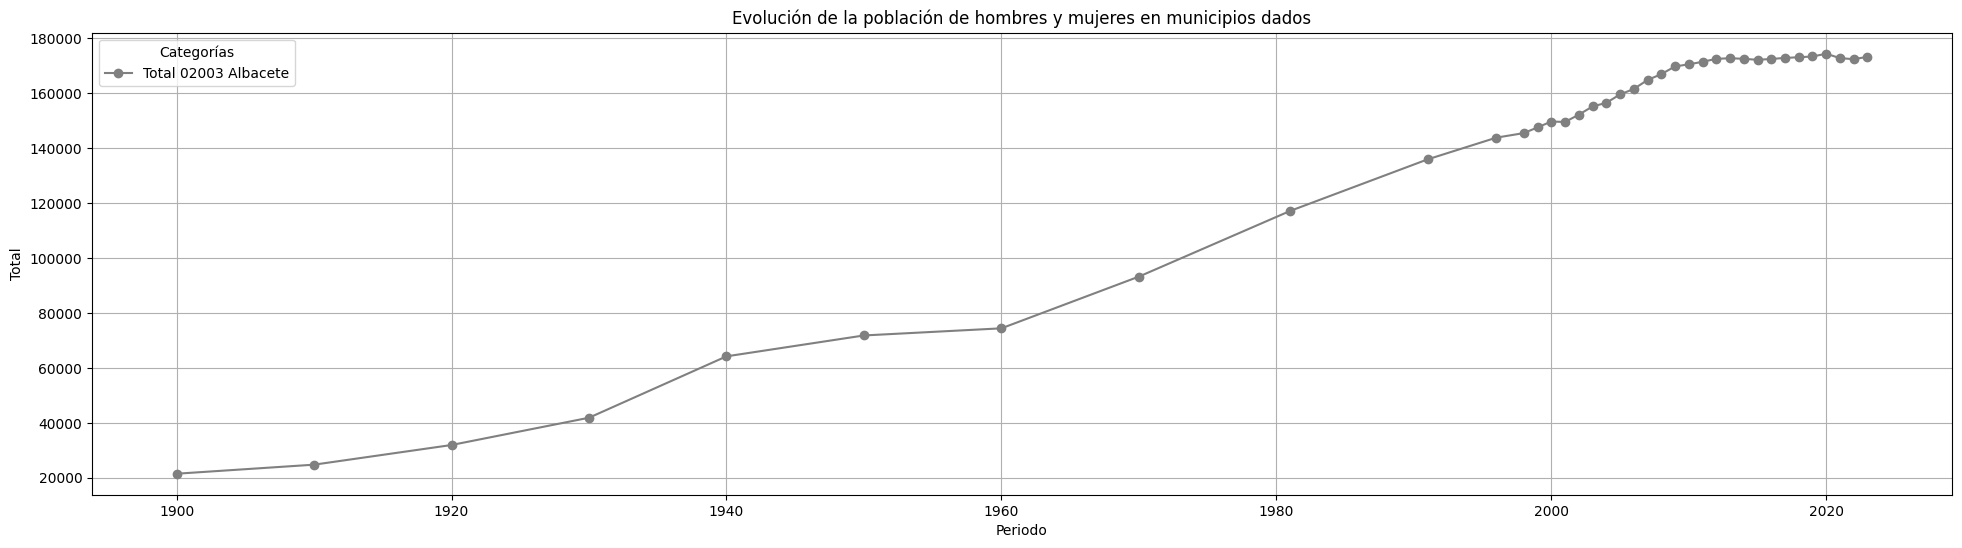

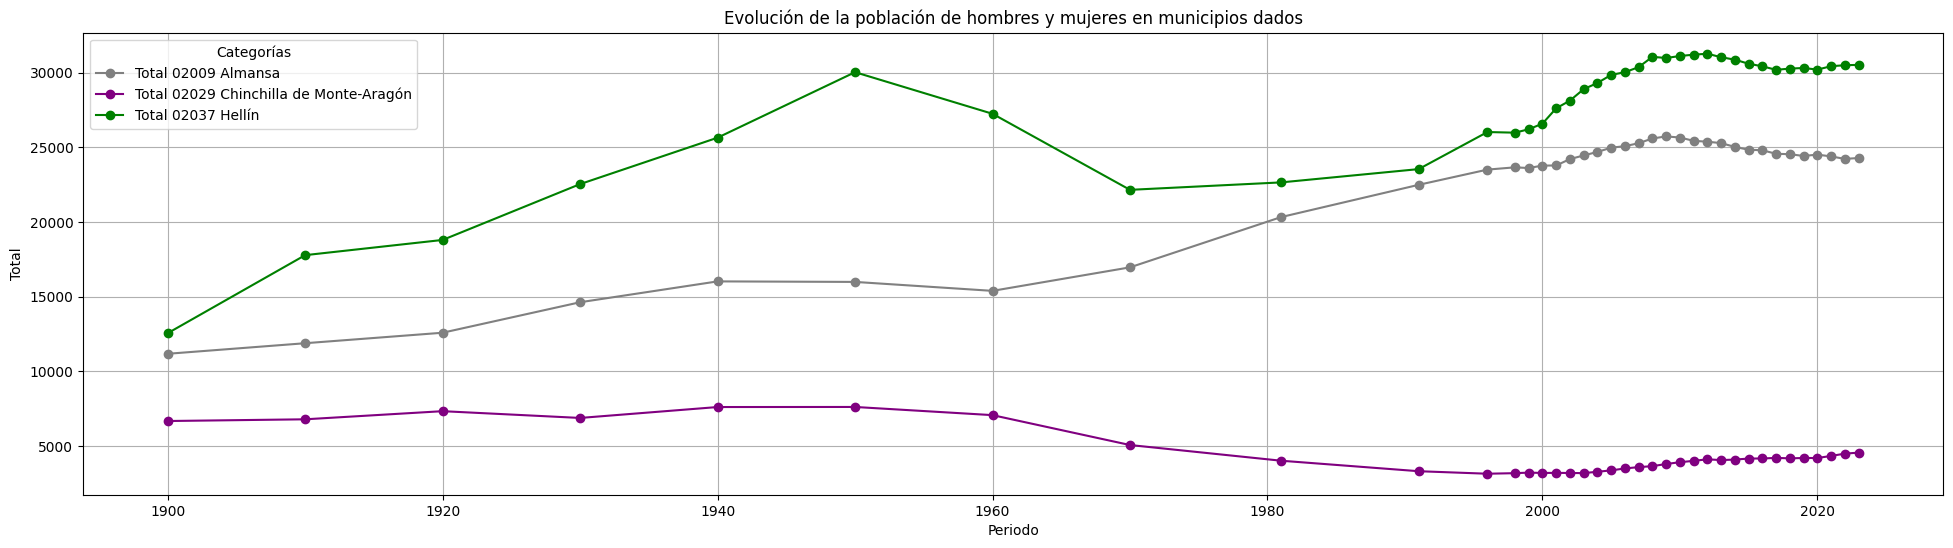

In [216]:
graficar_evolucion_poblacion_municipios( #PROVINCIA
    data3, '02 Albacete', 'null' , 'null' )
graficar_evolucion_poblacion_municipios( #CAPITAL
    data3, '02003 Albacete', 'null' , 'null' )

graficar_evolucion_poblacion_municipios(
    data3, '02009 Almansa', '02029 Chinchilla de Monte-Aragón' , '02037 Hellín' )

# La conclusion despues de ver varios graficos es, por una parte en los datos actuales los cambios demograficos que existen en el caso de las diferencias y preferencias de hombres y mujeres. Los hombres prefieren mas el campo, la provincia, y las mujeres mas la capital. No son conclusiones sino unterpretaciones ya que tendriamos que conocer datos como de mortalidad y esperanza de vida para saber a que atribuir esa diferencia.

# Por ultimo, en el final he puesto otro dataset, y he observado las diferencias y cambios demograficos en la provincia, pudiendo observar como, antes no habia tanta diferencia de poblacion entre la ciudad y los pueblos (en 1900 era entre 6000 y 13000 los grandes pueblos de Albacete vs 20000 en Albacete, y ahora es 30000, 25000 y 5000 vs 170000. Es decir, antes esos 3 pueblos sumaban mas poblacion que la capital, ahora los 3 no son ni 1/3 parte